In [1]:
import os
import numpy as np
import CRNS_library as CRNS_lib
import time
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import CRNS_optimizer as CRNS_opt
from scipy.optimize import curve_fit
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

Not a file to run, only methods included here.

Block completed at time:                       10:35:09 on 2024-10-04


In [2]:

#dfi_moderated = pd.read_csv(csv_filename, sep=';', index_col=0)  # Set index_col to 0 for row names
### Iterate over EU Study sites:
plog_flag_id=0
suffix_csv = "rmse_u"
csv_filename=f'my_dataframe_moderated_{suffix_csv}.csv'
#csv_filename='my_dataframe_epithermal.csv'
dfi_moderated = pd.read_csv(csv_filename, sep=';', index_col=0)  # Set index_col to 0 for row names

#csv_filename='my_dataframe_slow.csv'
csv_filename=f'my_dataframe_slow_{suffix_csv}-.csv'
dfi_slow = pd.read_csv(csv_filename, sep=';', index_col=0)  # Set index_col to 0 for row names

In [3]:
def calc_rmse(ts1,ts2):
    return np.sqrt(np.sum((ts1 - ts2)**2))

def calc_mae(ts1,ts2):
    return np.mean(abs(ts1 - ts2))

MAE beta= 0.00038002683625356146
MAE omega= 0.0035558353042266233
MAE psi= 0.3446342393672986


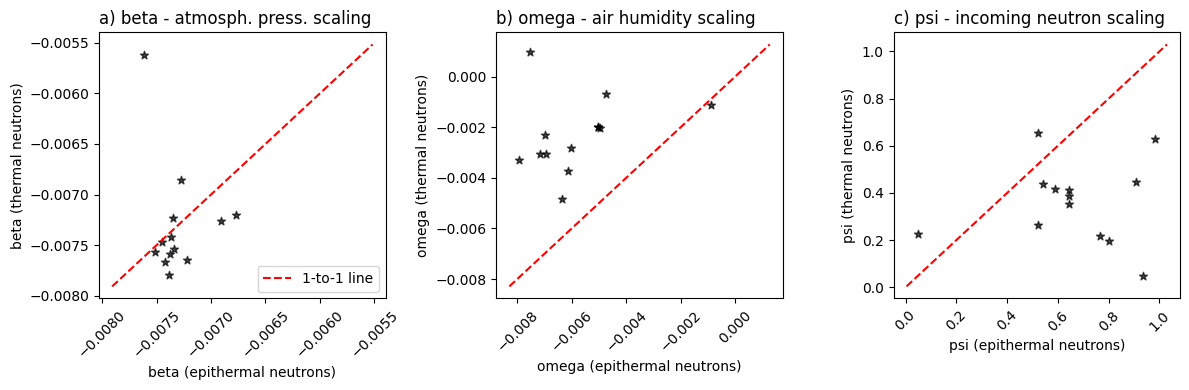

Save file as ./plots/Figure_6_Scatter_Moderated_vs_Slow.png


In [12]:

# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First subplot
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(dfi_moderated['beta'], dfi_slow['beta'], color='k', marker='*', alpha=0.7)
print("MAE beta=",calc_mae(dfi_moderated['beta'], dfi_slow['beta']))
# Get the limits of the x and y axes
x_limits = ax1.get_xlim()
y_limits = ax1.get_ylim()

# Determine the range for the 1:1 line
min_limit = min(x_limits[0], y_limits[0])
max_limit = max(x_limits[1], y_limits[1])

# Plot the 1:1 line
ax1.plot([min_limit, max_limit], [min_limit, max_limit], 'r--', label='1-to-1 line')

# Set the limits again to ensure the plot is correct
#ax1.set_xlim(x_limits)
#ax1.set_ylim(y_limits)

# Rotate the x-axis labels
ax1.tick_params(axis='x', rotation=45)

ax1.set_xlabel('beta (epithermal neutrons)')
ax1.set_ylabel('beta (thermal neutrons)')

ax1.legend()
ax1.set_title('a) beta - atmosph. press. scaling', loc='left')

# Second subplot
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(dfi_moderated['omega'], dfi_slow['omega'], color='k', marker='*', alpha=0.7)
print("MAE omega=",calc_mae(dfi_moderated['omega'], dfi_slow['omega']))

# Get the limits of the x and y axes
x_limits = ax2.get_xlim()
y_limits = ax2.get_ylim()

# Determine the range for the 1:1 line
min_limit = min(x_limits[0], y_limits[0])
max_limit = max(x_limits[1], y_limits[1])

# Plot the 1:1 line
ax2.plot([min_limit, max_limit], [min_limit, max_limit], 'r--')

# Set the limits again to ensure the plot is correct
#ax2.set_xlim(x_limits)
#ax2.set_ylim(y_limits)

# Rotate the x-axis labels
ax2.tick_params(axis='x', rotation=45)

ax2.set_xlabel('omega (epithermal neutrons)')
ax2.set_ylabel('omega (thermal neutrons)')
ax2.set_title('b) omega - air humidity scaling', loc='left')

# Third subplot
ax3 = plt.subplot(1, 3, 3)
ax3.scatter(dfi_moderated['psi'], dfi_slow['psi'], color='k', marker='*', alpha=0.7)
print("MAE psi=",calc_mae(dfi_moderated['psi'], dfi_slow['psi']))

# Get the limits of the x and y axes
x_limits = ax3.get_xlim()
y_limits = ax3.get_ylim()

# Determine the range for the 1:1 line
min_limit = min(x_limits[0], y_limits[0])
max_limit = max(x_limits[1], y_limits[1])

# Plot the 1:1 line
ax3.plot([min_limit, max_limit], [min_limit, max_limit], 'r--')

# Set the limits again to ensure the plot is correct
#ax3.set_xlim(x_limits)
#ax3.set_ylim(y_limits)

# Rotate the x-axis labels
ax3.tick_params(axis='x', rotation=45)

ax3.set_xlabel('psi (epithermal neutrons)')
ax3.set_ylabel('psi (thermal neutrons)')
ax3.set_title('c) psi - incoming neutron scaling', loc='left')

plt.tight_layout()
plt.show()


pngname="./plots/Figure_6_Scatter_Moderated_vs_Slow.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

$y=-0.00000000x^3+0.00000000x^2+-0.00000079x+0.00101329$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00106897$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00106897$


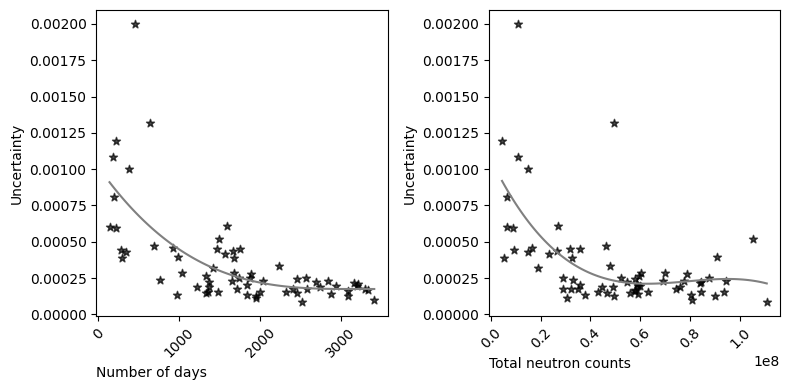

Save file as ./plots/Moderated_uncertainty_beta.png


In [5]:

# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# First subplot
ax1 = plt.subplot(1, 2, 1)
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['beta_sd']
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)


ax1.set_xlabel('Number of days', loc='left')
ax1.set_ylabel('Uncertainty')

#ax1.set_title('Uncertainty', loc='left')

# First subplot
ax2 = plt.subplot(1, 2, 2)
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['beta_sd']
ax2.scatter(xdata, ydata, color='k', marker='*', alpha=0.7)

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)
ax2.plot(xaxis, curve_y, color='grey')

ax2.tick_params(axis='x', rotation=45)


ax2.set_xlabel('Total neutron counts', loc='left')
ax2.set_ylabel('Uncertainty')
#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')


plt.tight_layout()
plt.show()


pngname="./plots/Moderated_uncertainty_beta.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

$y=0.00000000x^3+-0.00000000x^2+-0.00000036x+0.00363275$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00313187$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00313187$


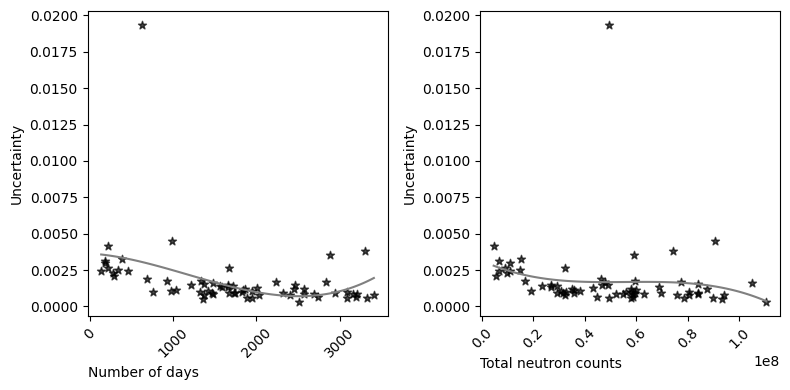

Save file as ./plots/Moderated_uncertainty_omega.png


In [6]:

# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# First subplot
ax1 = plt.subplot(1, 2, 1)
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['omega_sd']
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)


ax1.set_xlabel('Number of days', loc='left')
ax1.set_ylabel('Uncertainty')

#ax1.set_title('Uncertainty', loc='left')

# First subplot
ax2 = plt.subplot(1, 2, 2)
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['omega_sd']
ax2.scatter(xdata, ydata, color='k', marker='*', alpha=0.7)

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)
ax2.plot(xaxis, curve_y, color='grey')

ax2.tick_params(axis='x', rotation=45)


ax2.set_xlabel('Total neutron counts', loc='left')
ax2.set_ylabel('Uncertainty')
#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')


plt.tight_layout()
plt.show()


pngname="./plots/Moderated_uncertainty_omega.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

$y=-0.00000000x^3+0.00000042x^2+-0.00083483x+0.73429030$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000002x + 0.66760660$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000002x+0.66760660$


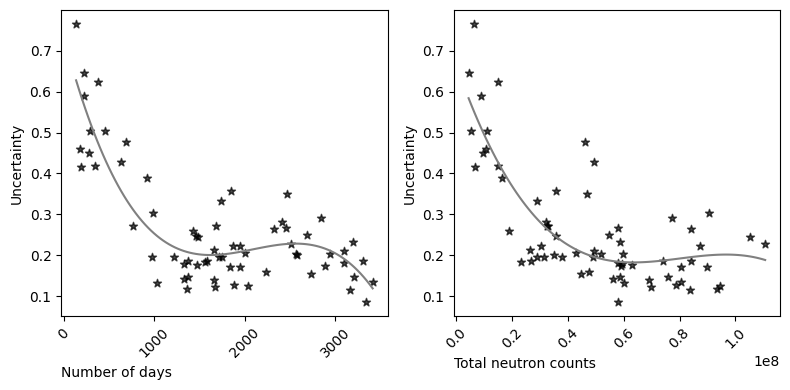

Save file as ./plots/Moderated_uncertainty_psi.png


In [7]:

# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# First subplot
ax1 = plt.subplot(1, 2, 1)
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['psi_sd']
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)


ax1.set_xlabel('Number of days', loc='left')
ax1.set_ylabel('Uncertainty')

#ax1.set_title('Uncertainty', loc='left')

# First subplot
ax2 = plt.subplot(1, 2, 2)
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['psi_sd']
ax2.scatter(xdata, ydata, color='k', marker='*', alpha=0.7)

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)
ax2.plot(xaxis, curve_y, color='grey')

ax2.tick_params(axis='x', rotation=45)


ax2.set_xlabel('Total neutron counts', loc='left')
ax2.set_ylabel('Uncertainty')
#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')


plt.tight_layout()
plt.show()


pngname="./plots/Moderated_uncertainty_psi.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

$y=-0.00000000x^3+0.00000000x^2+-0.00000079x+0.00101329$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00106897$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00106897$
$y=0.00000000x^3+-0.00000000x^2+-0.00000036x+0.00363275$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00313187$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00313187$
$y=-0.00000000x^3+0.00000042x^2+-0.00083483x+0.73429030$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000002x + 0.66760660$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000002x+0.66760660$


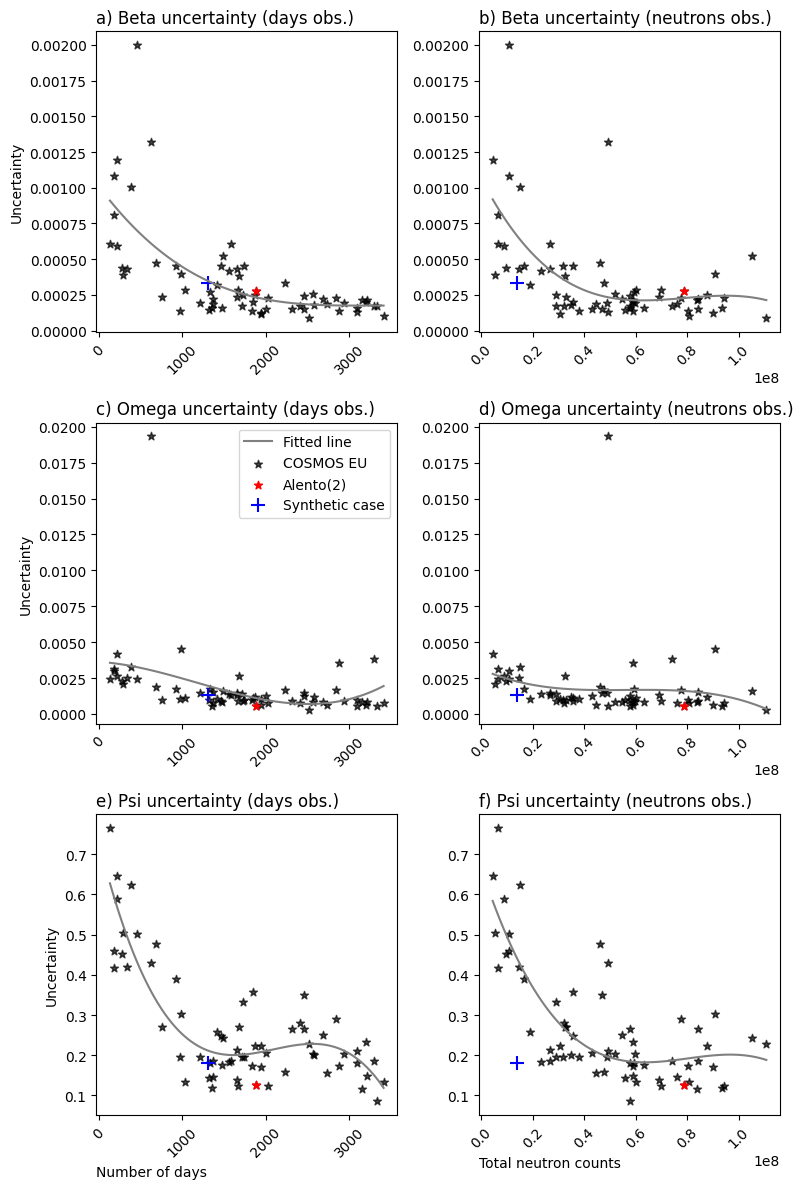

Save file as ./plots/Moderated_uncertainty_all.png


In [8]:

# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(3, 2, figsize=(8, 4*3))

# First subplot
ax1 = axes[0, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['beta_sd']


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax1.scatter(1315,  0.00033, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax1.set_ylabel('Uncertainty')
function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)


# First subplot
ax2 = axes[0, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['beta_sd']

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)

ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*24*445.903,0.00033, color='b', marker='+', s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)
ax1.set_title('a) Beta uncertainty (days obs.)', loc='left')
ax2.set_title('b) Beta uncertainty (neutrons obs.)', loc='left')

#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')

ax1 = axes[1, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['omega_sd']


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)

ax1.plot(xaxis, curve_y, color='grey', label='Fitted line')
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7, label='COSMOS EU')
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1, label='Alento(2)')
ax1.scatter(1315,0.0013, color='b', marker='+', alpha=1, s=93, label='Synthetic case') #SYN: 1315, 445.903*24*1315

ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Uncertainty')

# First subplot
ax2 = axes[1, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['omega_sd']

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)
ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*445.903*24,0.0013, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)

ax1.set_title('c) Omega uncertainty (days obs.)', loc='left')
ax2.set_title('d) Omega uncertainty (neutrons obs.)', loc='left')




# First subplot
ax1 = axes[2, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['psi_sd']


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax1.scatter(1315,0.18, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Uncertainty')
ax1.set_xlabel('Number of days', loc='left')

# First subplot
ax2 = axes[2, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['psi_sd']

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)

ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*445.903*24,0.18, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)

ax1.set_title('e) Psi uncertainty (days obs.)', loc='left')
ax2.set_title('f) Psi uncertainty (neutrons obs.)', loc='left')

ax2.set_xlabel('Total neutron counts', loc='left')
#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')


plt.tight_layout()
plt.show()


pngname="./plots/Moderated_uncertainty_all.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

$y=-0.00000000x^3+0.00000000x^2+-0.00000079x+0.00101329$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00106897$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00106897$
$y=-0.00000000x^3+0.00000000x^2+-0.00000244x+0.00335618$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000000x + 0.00376603$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000000x+0.00376603$
$y=-0.00000000x^3+0.00000042x^2+-0.00083483x+0.73429030$
$f(x) = -0.00000000x^3 + 0.00000000x^2 + -0.00000002x + 0.66760660$
$y=-0.00000000x^{3}+0.00000000x^{2}+-0.00000002x+0.66760660$


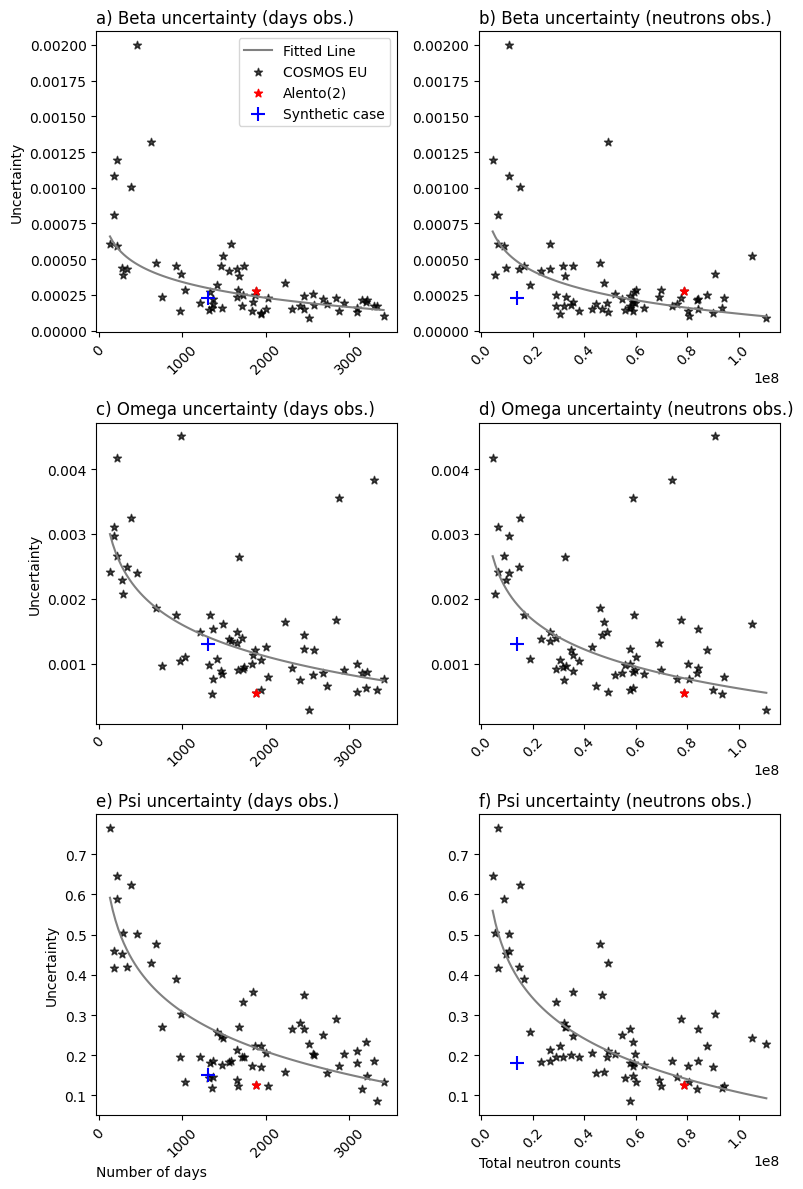

Save file as ./plots/Figure_5_Moderated_uncertainty_all.png


In [9]:
from scipy.optimize import minimize
from scipy.optimize import least_squares
# Define the objective function to minimize (sum of absolute errors)
def objective_function(params, x, y):
    a, b = params
    return np.sum(np.abs(y - logarithmic_function(x, a, b)))

# Define a logarithmic function for fitting
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Define a residual function for least squares fitting
def residuals(params, x, y):
    a, b = params
    return y - logarithmic_function(x, a, b)


# Define an exponential function for fitting
def exponential_function(x, a, b):
    return a * np.exp(b * x)
    
# Assuming dfi_moderated and dfi_slow are already defined
fig, axes = plt.subplots(3, 2, figsize=(8, 4*3))

# First subplot
ax1 = axes[0, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['beta_sd']


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform robust fitting using least squares with Huber loss
result = least_squares(residuals, initial_guess, args=(xdata, ydata), loss='huber')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

#ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

# Perform robust fitting using least squares with Soft L1 loss (LAD approximation)
result = least_squares(residuals, initial_guess, args=(xdata, ydata), loss='soft_l1')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

# Perform the minimization using absolute error
result = minimize(objective_function, initial_guess, args=(xdata, ydata), method='Nelder-Mead')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7, label='COSMOS EU')
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1, label='Alento(2)')
ax1.scatter(1315,  0.00023, color='b', marker='+',s=93, alpha=1, label='Synthetic case') #SYN: 1315, 445.903*24*1315

ax1.legend()





ax1.set_ylabel('Uncertainty')
function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)


# First subplot
ax2 = axes[0, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['beta_sd']

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)

# Perform the minimization using absolute error
result = minimize(objective_function, initial_guess, args=(xdata, ydata), method='Nelder-Mead')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*24*445.903,0.00023, color='b', marker='+', s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)
ax1.set_title('a) Beta uncertainty (days obs.)', loc='left')
ax2.set_title('b) Beta uncertainty (neutrons obs.)', loc='left')

#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')

ax1 = axes[1, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['omega_sd']







# Finding the index of the dot with the highest uncertainty (highest omega_sd)
max_uncertainty_index = dfi_moderated['omega_sd'].idxmax()
# Removing the row with the highest uncertainty
ydata = dfi_moderated.drop(max_uncertainty_index)
#xdata = xdata.drop(max_uncertainty_index)


# Ensure xdata and ydata are numeric
xdata = dfi_moderated['number_of_days_for_regression'].astype(float)
ydata = dfi_moderated['omega_sd'].astype(float)

# Drop the row with the highest uncertainty for both xdata and ydata
xdata = xdata.drop(max_uncertainty_index)
ydata = ydata.drop(max_uncertainty_index)








coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)
function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform robust fitting using least squares with Huber loss
result = least_squares(residuals, initial_guess, args=(xdata, ydata), loss='huber')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

#ax1.plot(xaxis, curve_y, color='grey', label='Fitted line')


# Perform the minimization using absolute error
result = minimize(objective_function, initial_guess, args=(xdata, ydata), method='Nelder-Mead')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)

ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')

ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7, label='COSMOS EU')
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1, label='Alento(2)')
ax1.scatter(1315,0.0013, color='b', marker='+', alpha=1, s=93, label='Synthetic case') #SYN: 1315, 445.903*24*1315

#ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Uncertainty')

# First subplot
ax2 = axes[1, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['omega_sd']




# Finding the index of the dot with the highest uncertainty (highest omega_sd)
max_uncertainty_index = dfi_moderated['omega_sd'].idxmax()
# Removing the row with the highest uncertainty
ydata = dfi_moderated.drop(max_uncertainty_index)
# Calculate xdata as a pandas Series and then drop the same index
xdata = (dfi_moderated['number_of_days_for_regression'] * dfi_moderated['mean_N'] * 24)
xdata = xdata.drop(max_uncertainty_index)



# Ensure xdata and ydata are numeric
xdata = (dfi_moderated['number_of_days_for_regression'] * dfi_moderated['mean_N'] * 24).astype(float)
ydata = dfi_moderated['omega_sd'].astype(float)

# Drop the row with the highest uncertainty for both xdata and ydata
xdata = xdata.drop(max_uncertainty_index)
ydata = ydata.drop(max_uncertainty_index)






coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)



# Perform the minimization using absolute error
result = minimize(objective_function, initial_guess, args=(xdata, ydata), method='Nelder-Mead')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)


#ax2.plot(xaxis, curve_y, color='grey', label=function_text)
ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*445.903*24,0.0013, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)

ax1.set_title('c) Omega uncertainty (days obs.)', loc='left')
ax2.set_title('d) Omega uncertainty (neutrons obs.)', loc='left')




# First subplot
ax1 = axes[2, 0]
xdata = dfi_moderated['number_of_days_for_regression']
ydata = dfi_moderated['psi_sd']


coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform robust fitting using least squares with Huber loss
result = least_squares(residuals, initial_guess, args=(xdata, ydata), loss='huber')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)



ax1.plot(xaxis, curve_y, color='grey', label='Fitted Line')
ax1.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax1.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax1.scatter(1315,0.15, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Uncertainty')
ax1.set_xlabel('Number of days', loc='left')

# First subplot
ax2 = axes[2, 1]
xdata = dfi_moderated['number_of_days_for_regression']*dfi_moderated['mean_N']*24
ydata = dfi_moderated['psi_sd']

coefficients = np.polyfit(xdata, ydata, 3)
# Create a polynomial function
p = np.poly1d(coefficients)
# Now you can use 'p' to evaluate the polynomial at any point 'x':
xaxis = np.linspace(min(xdata), max(xdata), 100)
curve_y = p(xaxis)

function_text = f'$y={coefficients[0]:.8f}x^3+{coefficients[1]:.8f}x^2+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
function_text = f'$f(x) = {coefficients[0]:.8f}x^3 + {coefficients[1]:.8f}x^2 + {coefficients[2]:.8f}x + {coefficients[3]:.8f}$'
print(function_text)
function_text = f'$y={coefficients[0]:.8f}x^{{3}}+{coefficients[1]:.8f}x^{{2}}+{coefficients[2]:.8f}x+{coefficients[3]:.8f}$'
print(function_text)
#ax2.plot(xaxis, curve_y, color='grey', label=function_text)

# Initial guess for parameters
initial_guess = [1, 1]

# Perform robust fitting using least squares with Huber loss
result = least_squares(residuals, initial_guess, args=(xdata, ydata), loss='huber')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)


# Perform the minimization using absolute error
result = minimize(objective_function, initial_guess, args=(xdata, ydata), method='Nelder-Mead')

# Extract fitted parameters
a, b = result.x

# Create an x-axis for plotting the fitted curve
xaxis = np.linspace(min(xdata), max(xdata), 100)

# Evaluate the fitted logarithmic function
curve_y = logarithmic_function(xaxis, a, b)
ax2.plot(xaxis, curve_y, color='grey')
ax2.scatter(xdata,  ydata, color='k', marker='*', alpha=0.7)
ax2.scatter(xdata[4],  ydata[4], color='r', marker='*', alpha=1)
ax2.scatter(1315*445.903*24,0.18, color='b', marker='+',s=93, alpha=1) #SYN: 1315, 445.903*24*1315

ax2.tick_params(axis='x', rotation=45)

ax1.set_title('e) Psi uncertainty (days obs.)', loc='left')
ax2.set_title('f) Psi uncertainty (neutrons obs.)', loc='left')

ax2.set_xlabel('Total neutron counts', loc='left')
#ax2.legend()
#ax1.set_title('Uncertainty', loc='left')


plt.tight_layout()
plt.show()


pngname="./plots/Figure_5_Moderated_uncertainty_all.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')